# Installing and importing the required packages

In [7]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/39/2e/c4324c4acfec71626e3c3e5bdeef562fec3a90f5cc26368a97f665bd65e4/spacy-3.7.6-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/05/29/5f48eea8712697f66531c4b6018b1713a3aec2b4eddbce1c63f93adbf6b1/murmurhash-1.0.10-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org

  Obtaining dependency information for marisa-trie>=0.7.7 from https://files.pythonhosted.org/packages/2c/e1/b3eb01992e3b326cb95989e41692be229b50bd7a7abc23a84e95cd2b9566/marisa_trie-1.2.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 8.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.0/133.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.0/490.0 kB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.1/839.1 kB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 7.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━

In [4]:
!pip install textract

  Obtaining dependency information for textract from https://files.pythonhosted.org/packages/6b/3e/ac16b6bf28edf78296aea7d0cb416b49ed30282ac8c711662541015ee6f3/textract-1.6.5-py3-none-any.whl.metadata
  Obtaining dependency information for argcomplete~=1.10.0 from https://files.pythonhosted.org/packages/ae/8e/6b293f883fdbd29b9c8170db44bddff9e7de224d8cf1eb4287f69f1766e5/argcomplete-1.10.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for beautifulsoup4~=4.8.0 from https://files.pythonhosted.org/packages/cb/a1/c698cf319e9cfed6b17376281bd0efc6bfc8465698f54170ef60a485ab5d/beautifulsoup4-4.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for chardet==3.* from https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for extract-msg<=0.29.* from https://files.pythonhosted.org/packages/27/58/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3961 sha256=5fd1a48526903170f6117f762597e6e5ab1923b7bd7fe5f744a5b2f23e74a95f
  Stored in directory: /Users/rmanoj/Library/Caches/pip/wheels/0f/0e/7a/3094a4ceefe657bff7e12dd9592a9d5b6487ef4338ace0afa6
  Created wheel for compressed-rtf: filename=compressed_rtf-1.0.6-py3-none-any.whl size=6184 sha256=7b8c510feaecb56485dc61bbf28d46121e8d4dc9f52704debb57ddf89d6fdfb1
  Stored in directory: /Users/rmanoj/Library/Caches/pip/wheels/25/43/67/e46f8b6d3d39fb567b05bf0d01125410665a3e019a468ace25
Successfully built docx2txt compressed-rtf
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the aut

In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/39/4a/2684863905b72fceea24edaa10e3e16bc742a184042f463f3b09883d75b0/wordcloud-1.9.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 2.1 MB/s eta 0:00:00 0:00:01
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [62]:
os.listdir('Resumes/')


['.DS_Store',
 'SQL Developer Lightning insight',
 'React JS',
 'Peoplesoft resumes',
 'workday resumes']

In [63]:
!pip install pdfplumber

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [64]:
import pdfplumber


In [65]:
def extract_text_from_pdf(file_path):
    text = []
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text.append(page.extract_text())
    return '\n'.join(text)

# Extracting text from resumes and calssifying them as one category

In [66]:
file_path1 = []
category1  = []
directory1 = 'Resumes/PeopleSoft resumes/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')
    elif i.endswith('.pdf'):
        os.path.join(directory1, i)
        category1.append('PeopleSoft')
        text = extract_text_from_pdf(i)
        file_path1.append(text)
        


In [70]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
2,Classification: Internal\n\nClassification: In...,PeopleSoft
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
9,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft


In [71]:
file_path2 = []
category2  = []
directory2 = 'Resumes/React JS/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS')


In [72]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS
1,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS
2,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS
3,SUSOVAN BAG \n\nSeeking a challenging po...,React JS
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS
5,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS
6,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS
7,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS
8,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS
9,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS


In [73]:
file_path3 = []
category3  = []
directory3 = 'Resumes/SQL Developer Lightning insight/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [74]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
1,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
3,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
4,BUDDHA VAMSI ...,SQL Developer
5,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
6,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
7,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
8,KAMBALLA PRADEEP ...,SQL Developer
9,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer


In [75]:
file_path4 = []
category4  = []
directory4 = 'Resumes/workday resumes/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [76]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
1,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
2,G Himaja\n\n ...,Workday
3,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday
4,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
5,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
6,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
7,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
8,Workday HCM Techno functional Consultant ...,Workday
9,Vinay kumar .v\nWorkday Functional Consultant\...,Workday


In [81]:
# Let us create a combined dataset
resume_data = pd.concat([data1,data2,data3,data4],ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
2,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
6,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
9,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN


In [85]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [86]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [87]:
resume_data

,Category,Raw_Details
0,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
1,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
2,PeopleSoft,Classification: Internal\n\nClassification: In...
3,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...


In [88]:
# Saving the data to a csv file
resume_data.to_csv('Raw_Resume.csv', index=False)

In [89]:
# Let us perform preprocessing to remove unwanted characters
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)


In [91]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rmanoj/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [96]:
resume_data1 = pd.read_csv('Raw_Resume.csv')
resume_data1['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [97]:
# saving the cleaned data to a csv file
resume_data.to_csv('Cleaned_Resumes.csv', index = False)


In [98]:
resume_data1 = pd.read_csv('Cleaned_Resumes.csv')
resume_data1

,Category,Raw_Details,Resume_Details
0,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
1,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
2,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
3,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
9,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...


In [100]:
resume_data1.drop(columns='Raw_Details', inplace=True)

In [101]:
resume_data1

,Category,Resume_Details
0,PeopleSoft,address manyata tech park nagavara bangalore l...
1,PeopleSoft,tanna sujatha objective seeking challenging ro...
2,PeopleSoft,classification internal classification interna...
3,PeopleSoft,anubhav kumar singh core competencies scriptin...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administration vivekanand sayana ca...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,murali professional summary years experience p...


In [102]:
# Visualizing the type of format and counts
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}


In [115]:
file_path = 'Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)


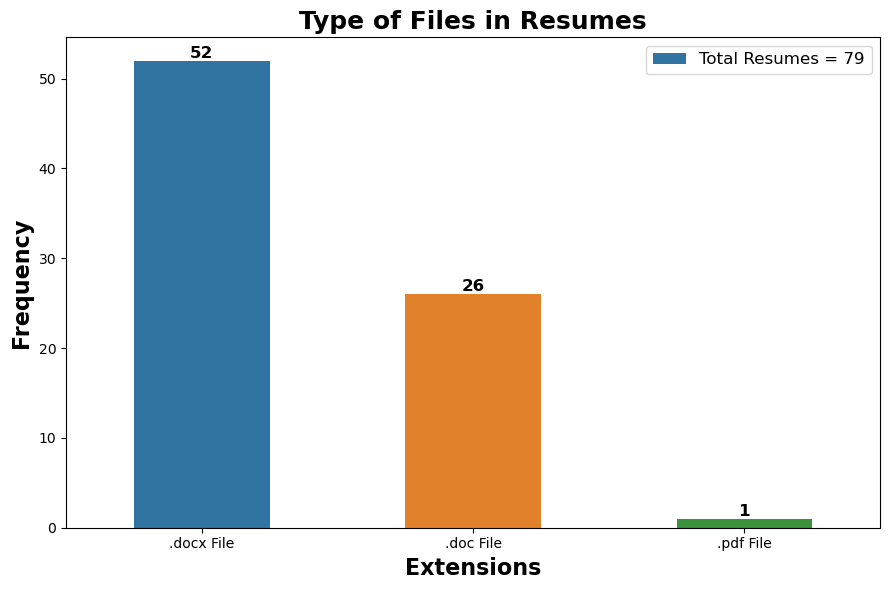

In [116]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

In [117]:
# Let us group by category and visualize the same

In [118]:
file_path = r'Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)


In [119]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,SQL Developer Lightning insight,Ramalakshmi K.docx
1,SQL Developer Lightning insight,PSyamKumar[2_3].docx
2,SQL Developer Lightning insight,RameshNataru[3_4].docx
3,SQL Developer Lightning insight,premsai.docx
4,SQL Developer Lightning insight,Nazeer Basha.doc
...,...,...
74,workday resumes,Vinay Kumar_Hexaware.docx
75,workday resumes,P V Sai Krishna_ Hexaware.docx
76,workday resumes,Harikrishna Akula_Hexaware.doc
77,workday resumes,J. Sumanth Royal_Hexaware.doc


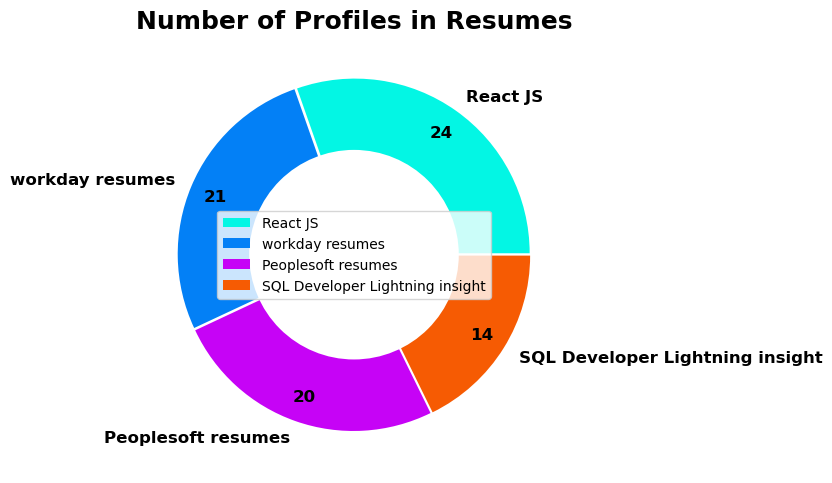

In [121]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [134]:
# We are creating a worcloud below to show most used words

In [130]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.drop(columns= 'Raw_Details',inplace=True)

In [131]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) 

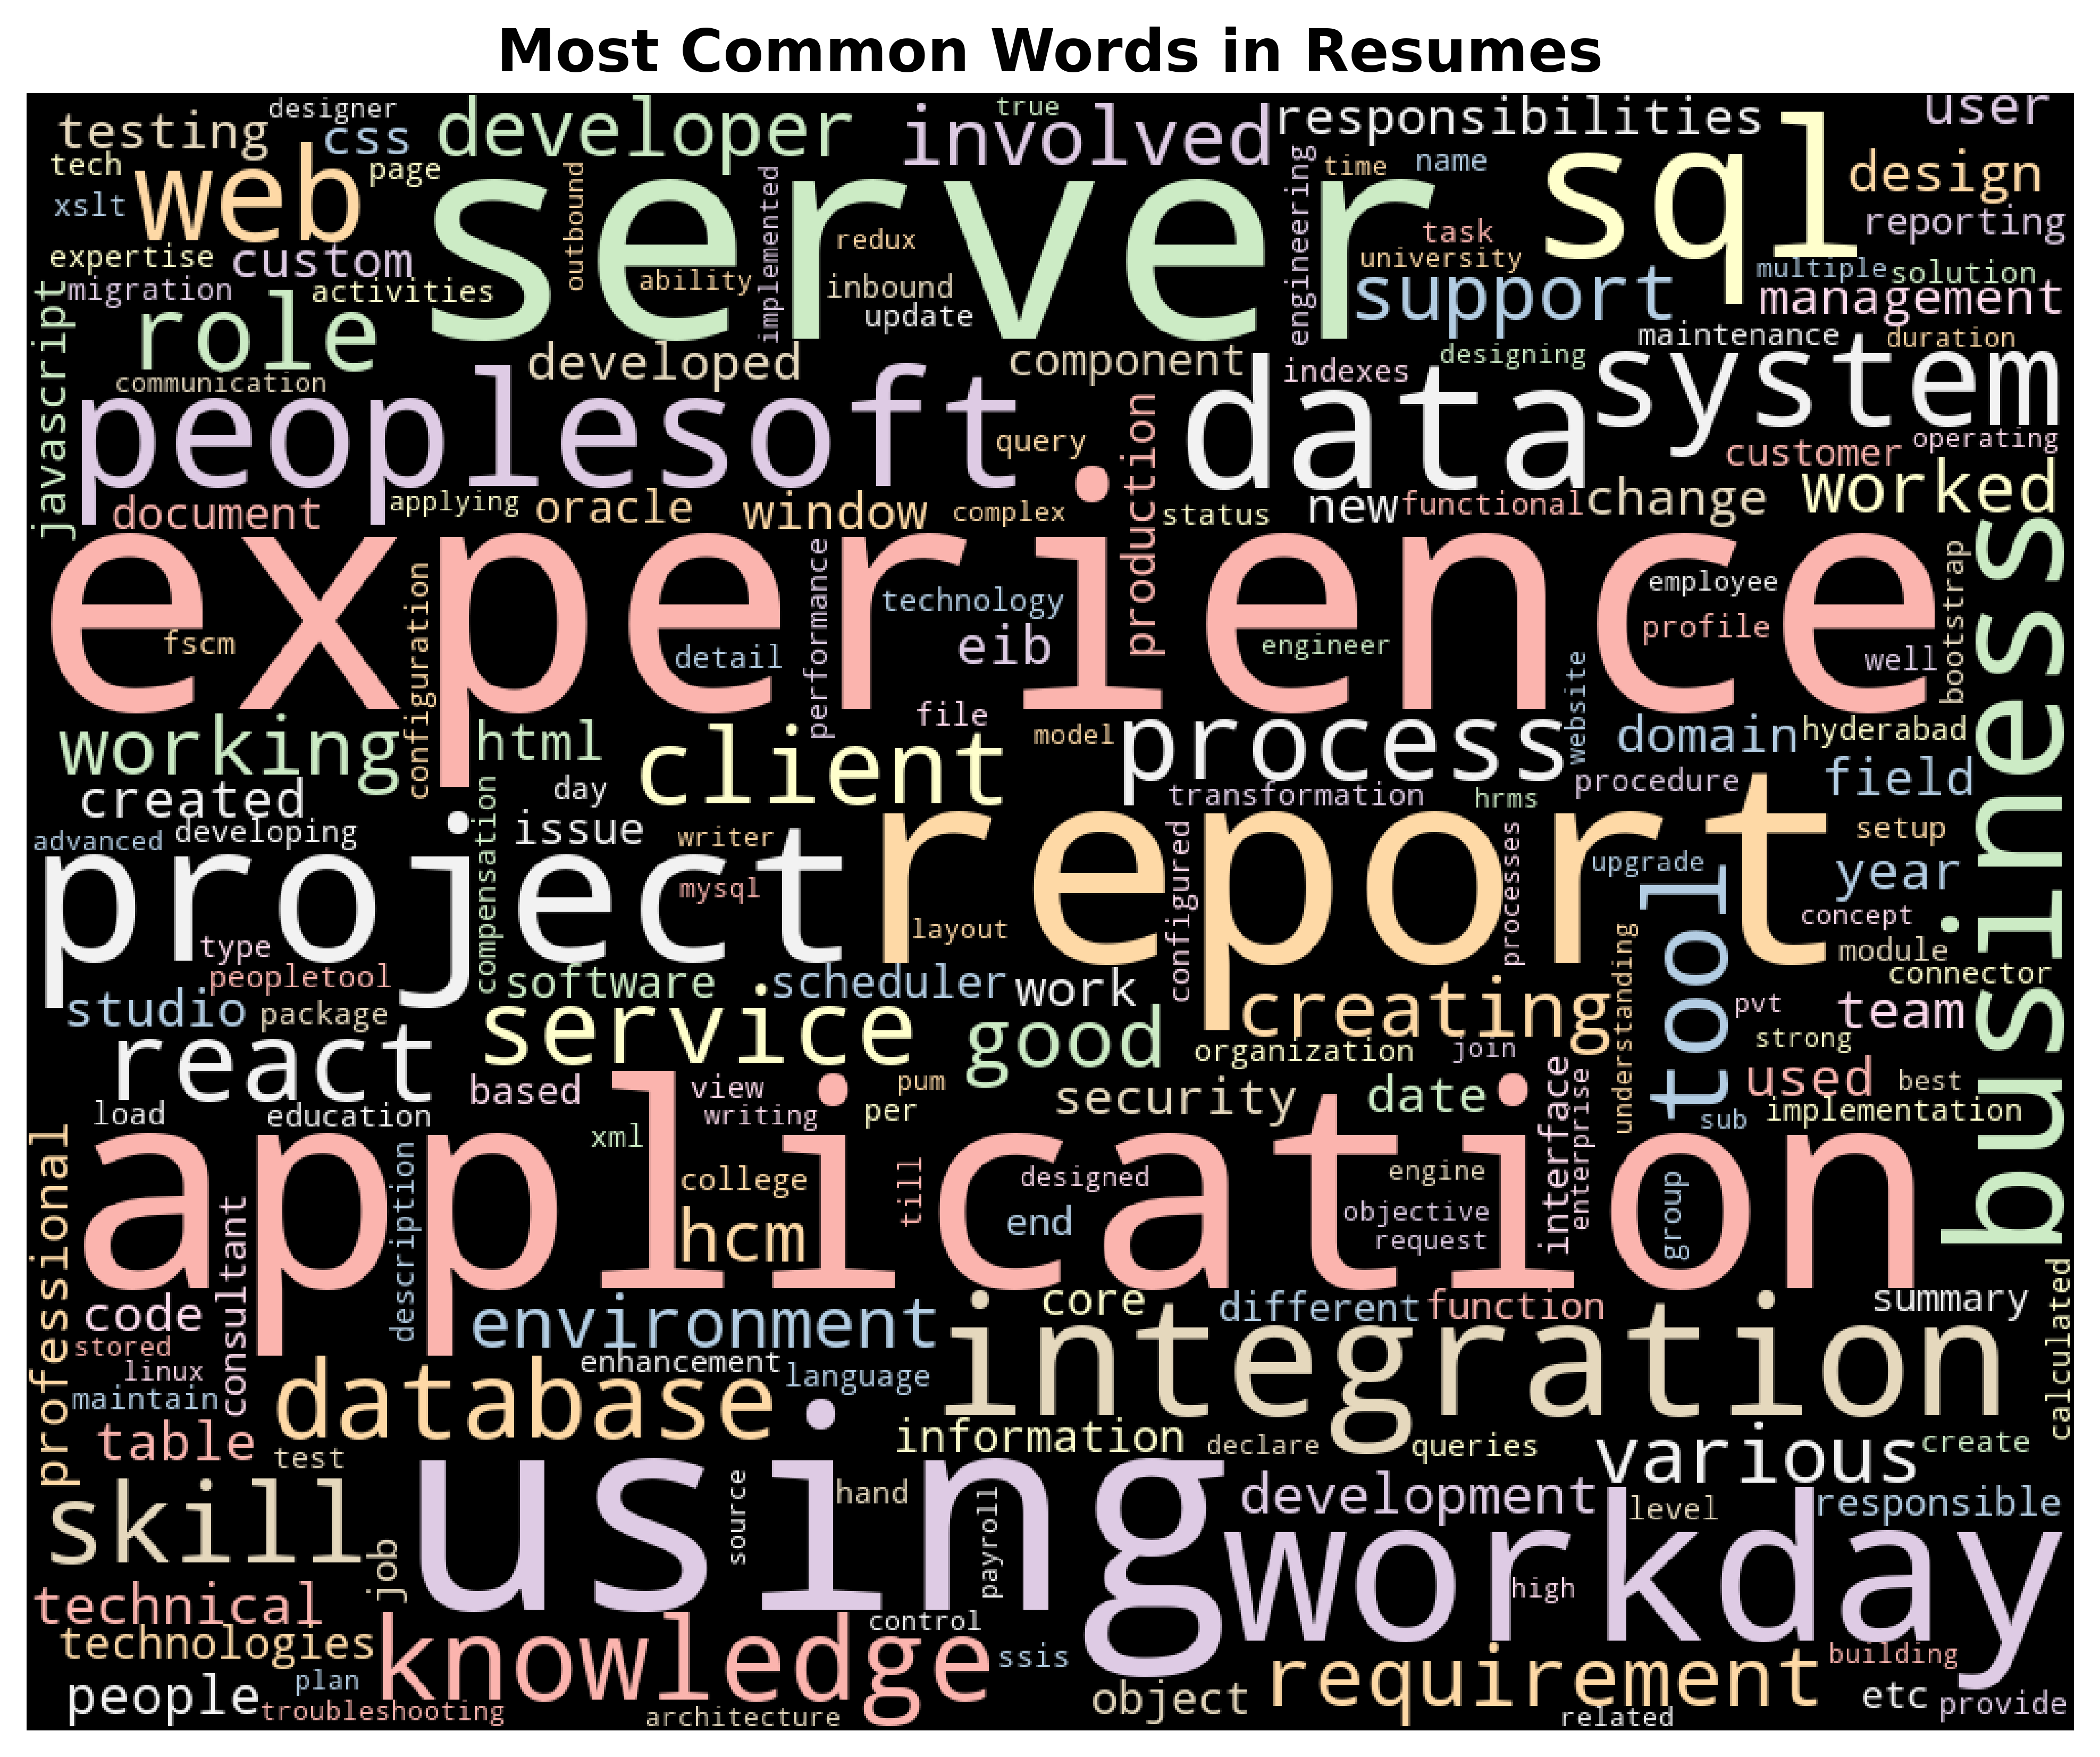

In [133]:
# wordcloud to show most used words in resumetext = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")


plt.show()